In [42]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [79]:
# constants
GAMMA = 1
WORLD_SIZE = 4
ACTIONS = [(1,0), (0,1), (-1,0), (0,-1)]
ITERS_TO_SAVE = [0, 1, 2, 3, 10, -1]

In [80]:
# gridworld implementation
class GridWorld:

    def __init__(self, terminal={(0, 0), (WORLD_SIZE - 1, WORLD_SIZE - 1)}):
        self.size = WORLD_SIZE
        self.terminal = terminal

    def step(self, state, action):
        if state in self.terminal: return state, 0
        s0, s1 = state
        a0, a1 = action
        x, y = s0 + a0, s1 + a1
        if x < 0 or y < 0 or x >= self.size or y >= self.size: return state, -1
        return (x, y), -1

In [84]:
# iterative policy evaluation implementation
def iterative_policy_evaluation(policy, env):
    mem = dict()
    v = np.zeros((WORLD_SIZE, WORLD_SIZE))
    iter, delta = 0, np.inf
    while delta > 1e-4:
        if iter in ITERS_TO_SAVE:
            mem[iter] = v
        vp = np.zeros_like(v)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for k, action in enumerate(ACTIONS):
                    (x, y), reward = env.step((i,j), action)
                    vp[i, j] += policy[i][j][k] * (reward + GAMMA * v[x, y])
        delta = np.max(np.abs(v - vp))
        v = vp.copy()
        iter += 1
    mem[-1] = v
    return mem

In [85]:
# generate data
policy = np.full((WORLD_SIZE, WORLD_SIZE, len(ACTIONS)), 1/len(ACTIONS))
env = GridWorld()
data = iterative_policy_evaluation(policy, env)

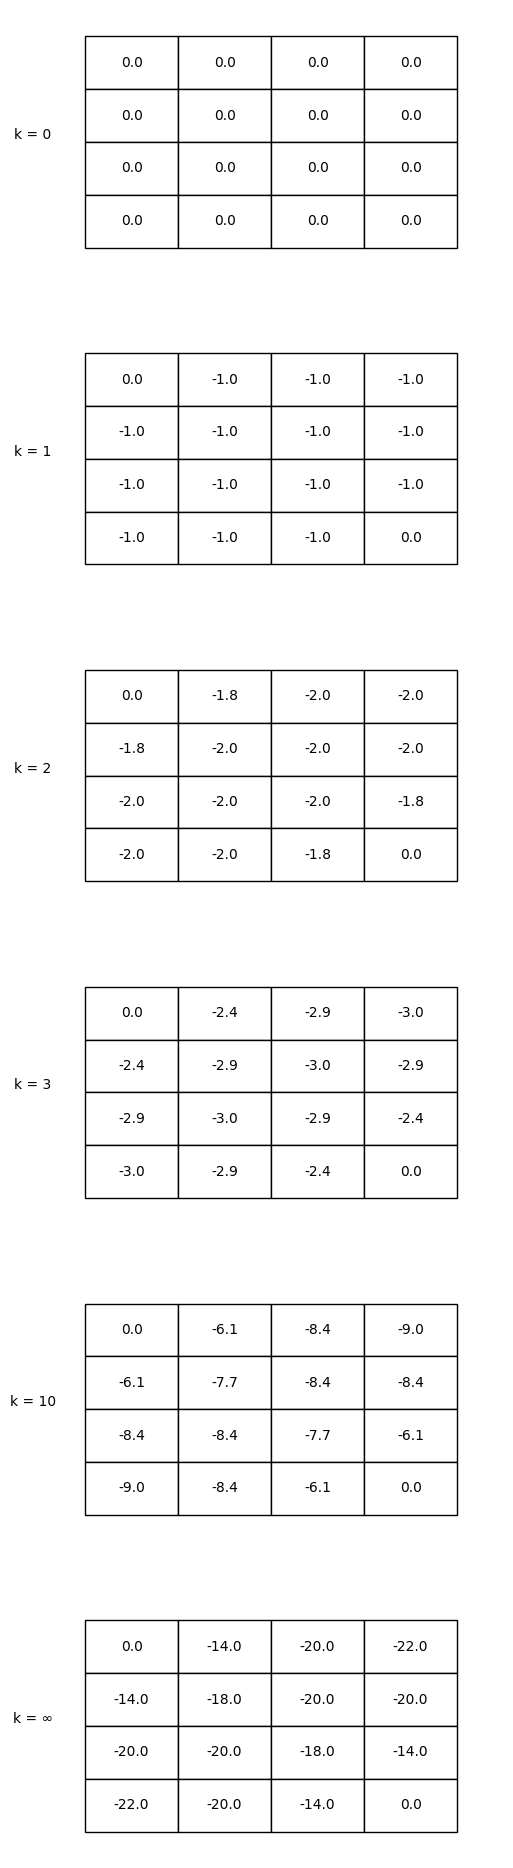

In [89]:
# generate figure 2.3

fig, axs = plt.subplots(len(ITERS_TO_SAVE), figsize=(6, 24))

for index in range(len(ITERS_TO_SAVE)):
    # axs[index].set_axis_off()
    tb = Table(axs[index])
    v = data[ITERS_TO_SAVE[index]]
    for (i, j), val in np.ndenumerate(v):
        tb.add_cell(i, j, 0.2, 0.2, text=np.round(val, 1), loc='center')
    axs[index].add_table(tb)
    k = ITERS_TO_SAVE[index]
    if k < 0: k = '\u221E'
    axs[index].set_ylabel(f"k = {k}", rotation=0)
    axs[index].xaxis.set_visible(False)
    plt.setp(axs[index].spines.values(), visible=False)
    axs[index].tick_params(left=False, labelleft=False)
    
plt.show()